In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset_name = 'GSE18520'
data = pd.read_csv("../data/OV/"+dataset_name+"/"+dataset_name+"_data.csv")
data

,ID,PROM1,PROM2,final_state,OS(M),disease,stage,grade,OS(d)
0,GSM461348,147.0730,1747.320,0.0,150.0,1,3.0,high,4500.0
1,GSM461349,463.9860,1987.320,1.0,7.0,1,3.0,high,210.0
2,GSM461350,511.0720,1166.980,0.0,144.0,1,3.0,high,4320.0
3,GSM461351,1057.2600,963.829,0.0,142.0,1,3.0,high,4260.0
4,GSM461352,84.8332,1667.390,1.0,95.0,1,3.0,high,2850.0
...,...,...,...,...,...,...,...,...,...
58,GSM462648,51.9978,127.593,NaN,NaN,0,NaN,NaN,NaN
59,GSM462649,53.4187,106.539,NaN,NaN,0,NaN,NaN,NaN
60,GSM462650,45.3499,287.443,NaN,NaN,0,NaN,NaN,NaN
61,GSM462651,46.0194,135.311,NaN,NaN,0,NaN,NaN,NaN


In [7]:
def plot_gene_expression_boxplot(data, gene, cancer_column, title):
    data['cancer_status'] = data[cancer_column].apply(lambda x: 'Cancer' if x == 1 else 'Normal')
    
    normal = data[data[cancer_column] == 0][gene]
    cancer = data[data[cancer_column] == 1][gene]

    # t-test
    t_stat, p_value = stats.ttest_ind(normal, cancer)
    
    # box plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='cancer_status', y=gene, data=data,order=['Normal', 'Cancer'])
    if p_value<0.001:
        plt.title('p-value < 0.0001')
    else:
        plt.title('p-value:',p_value)
    plt.xlabel(f'{title}')
    plt.ylabel(f'{gene} Expression')
    plt.tight_layout()
    plt.savefig('../pic/box_plot/{}-{}.png'.format(title,gene)) 

    plt.show()

D:\Anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


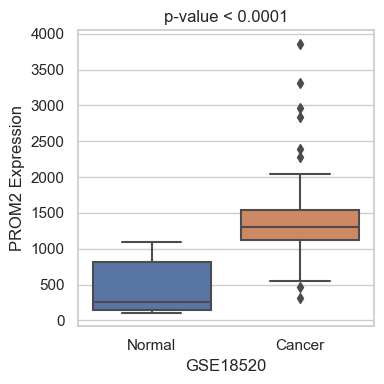

In [8]:
# box plot of PROM1
plot_gene_expression_boxplot(data, 'PROM2', 'disease', dataset_name)
# box plot of PROM2
plot_gene_expression_boxplot(data, 'PROM2', 'disease', dataset_name)